In [1]:
# Importando módulos utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando arquivos csv
exoTrain = pd.read_csv('exoTrain/exoTrain.csv')
exoTest = pd.read_csv('exoTest/exoTest.csv')

In [3]:
exoTrain.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
print(exoTrain.shape, exoTest.shape)

(5087, 3198) (570, 3198)


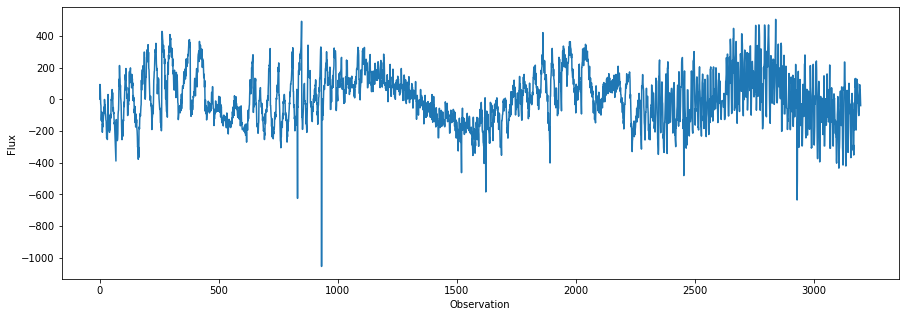

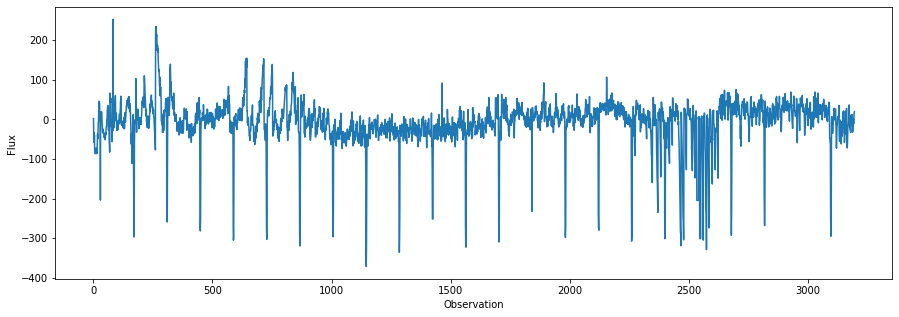

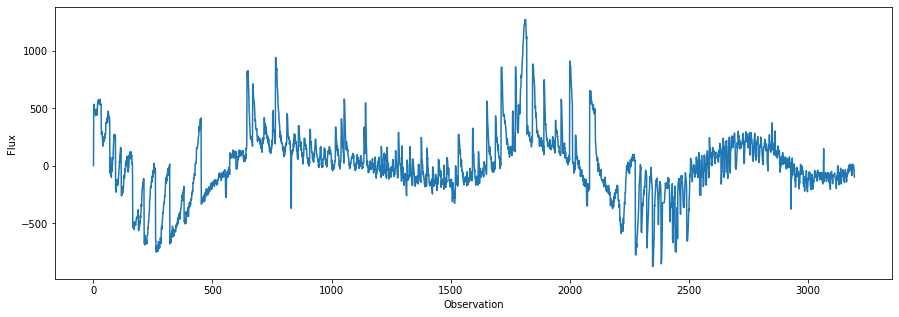

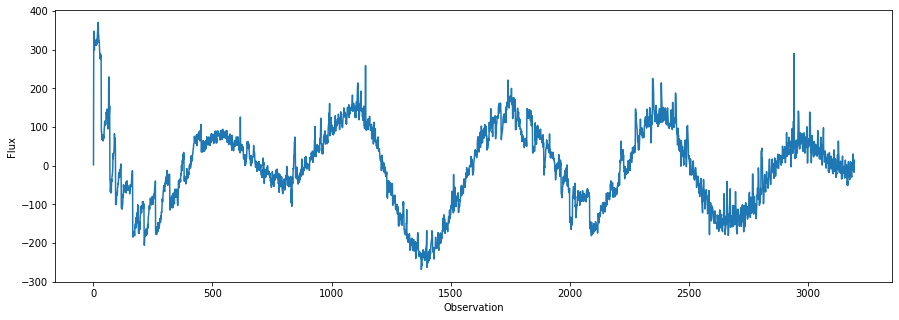

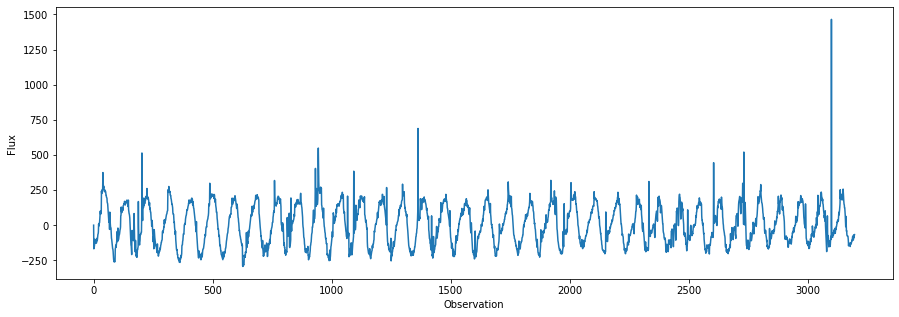

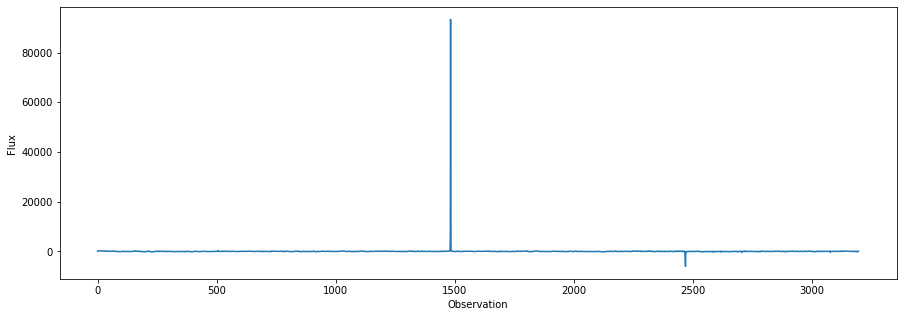

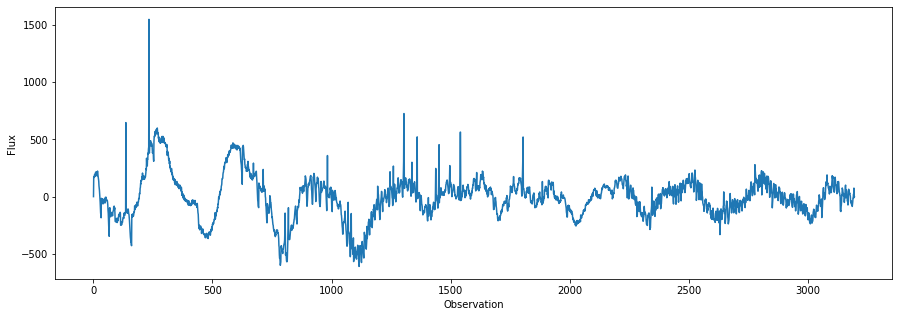

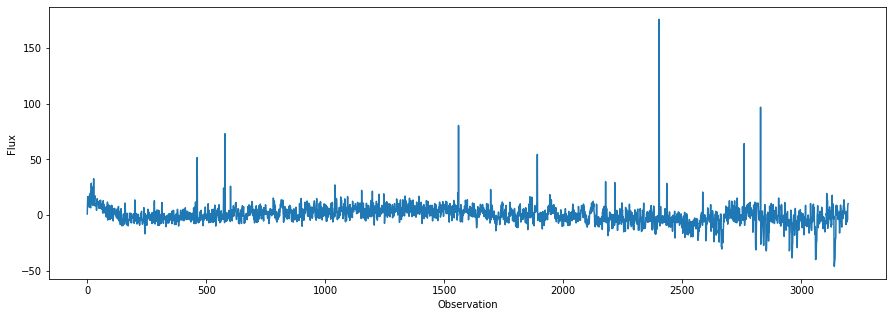

In [5]:
stars_samples=[0,1,2,3,40,41,42,43]
for i in stars_samples:
    Y = exoTrain.iloc[i]
    X = np.arange(len(Y))
    plt.figure(figsize=(15,5))
    plt.xlabel("Observation")
    plt.ylabel("Flux")
    plt.plot(X,Y)
    plt.show()

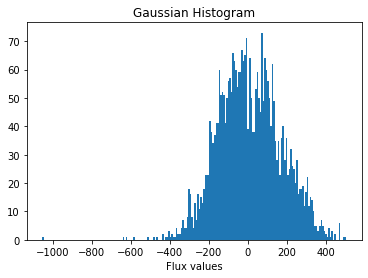

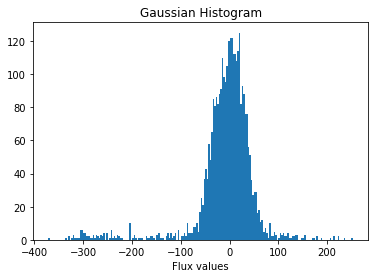

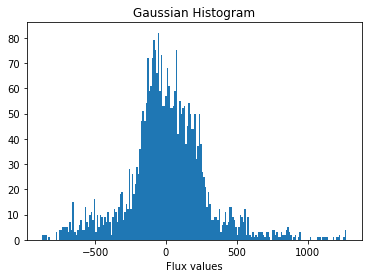

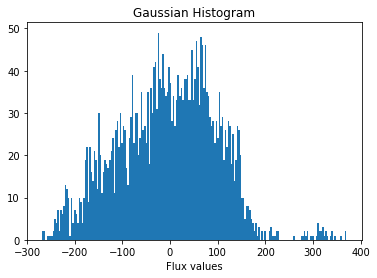

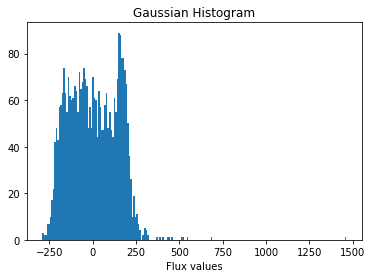

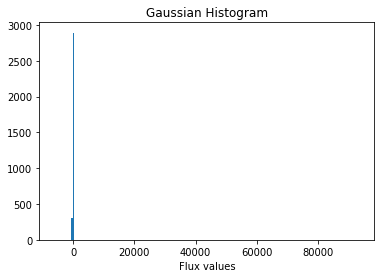

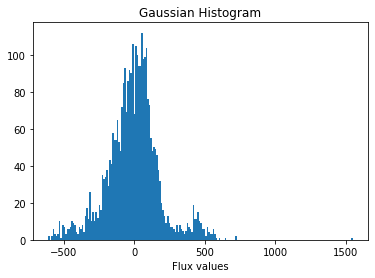

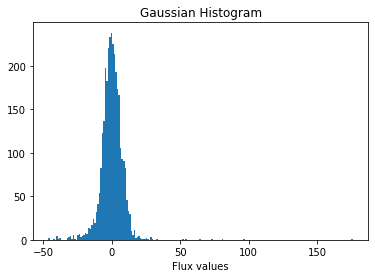

In [6]:
for i in stars_samples:
    plt.hist(exoTrain.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

In [7]:
# Dividindo dados em Label e Features
Y_train = np.reshape(np.array(exoTrain['LABEL']),(1,exoTrain.shape[0]))
X_train = np.transpose(np.array(exoTrain[exoTrain.columns[1:]]))
Y_test = np.reshape(np.array(exoTest['LABEL']),(1,exoTest.shape[0]))
X_test = np.transpose(np.array(exoTest[exoTest.columns[1:]]))

In [8]:
# Normalizando os dados
mean_train = np.reshape(np.mean(X_train,axis=0),(1,X_train.shape[1]))
std_train = np.reshape(np.std(X_train,axis=0),(1,X_train.shape[1]))
X_train = (X_train - mean_train)/std_train
mean_test = np.reshape(np.mean(X_test,axis=0),(1,X_test.shape[1]))
std_test = np.reshape(np.std(X_test,axis=0),(1,X_test.shape[1]))
X_test = (X_test - mean_test)/std_test

In [9]:
X_train

array([[ 0.52205598, -0.52418682,  1.86086099, ...,  4.40733518,
         0.27498946,  5.16248093],
       [ 0.45958061, -0.44002245,  1.87249912, ...,  4.48246107,
         0.11730004,  4.88787124],
       [ 0.06313585, -0.85184454,  1.79376438, ...,  4.21732046,
        -0.37308671,  4.67363673],
       ...,
       [ 0.32025558,  0.23145922, -0.13163528, ...,  1.39301064,
        -1.39943518, -0.35568069],
       [-0.03032828,  0.39045488, -0.27750212, ...,  1.24064034,
        -0.65747456, -0.31299609],
       [-0.30798274,  0.45595309, -0.37206186, ...,  1.24650701,
        -0.30563574,  0.36719848]])

In [10]:
# Definindo estrutura da rede (3 camadas)
def defining_structure(X):
    n_i = X.shape[0]
    n_h1 = 12
    n_h2 = 12
    n_o = 1
    
    nodes ={
        "n_i":n_i,
        "n_h1":n_h1,
        "n_h2":n_h2,
        "n_o":n_o
    }
    
    return nodes

In [11]:
nodes = defining_structure(X_train)
print(nodes["n_h1"], nodes["n_h2"])

12 12


In [12]:
# Inicialização Randomica de cada camada
def random_initialization(X):
    np.random.seed(2)
    
    nodes = defining_structure(X)
    
    W1 = np.random.randn(nodes["n_h1"],nodes["n_i"])
    b1 = np.zeros((nodes["n_h1"],1))
    W2 = np.random.randn(nodes["n_h2"],nodes["n_h1"])
    b2 = np.zeros((nodes["n_h2"],1))
    W3 = np.random.randn(nodes["n_o"],nodes["n_h2"])
    b3 = np.zeros((nodes["n_o"],1))
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3
    }
    
    return params

In [13]:
random_initialization(X_train)

{'W1': array([[-0.41675785, -0.05626683, -2.1361961 , ...,  1.61430797,
          0.99890746, -0.88203649],
        [-0.57428347, -1.55477478,  1.14098302, ..., -0.1082349 ,
          1.01994095,  0.1331631 ],
        [ 1.90829452, -1.35836971,  0.06887664, ...,  2.43568076,
         -0.50906617, -2.59542559],
        ...,
        [-1.26556713,  0.56972065,  0.81175451, ..., -1.26632935,
         -1.21179189, -1.38104343],
        [ 0.50079915,  1.67793197,  0.38873169, ...,  0.7008209 ,
          0.13992836,  0.80095466],
        [-0.94882391,  0.48822788, -1.02400764, ...,  1.99515716,
         -0.14299326, -0.75133526]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 1.53553181e+00,  4.56998839e-01,  3.77484828e-01,
         -9.45032861e-01,  6.48676419e-01,  5.98076928e-01,
         -2.11310427e+00,  1.27573134e+00,  2.28080883e-01,
     

In [14]:
# Função sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
# Propagação para frente 
def forward_propagation(X, Y, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2,
        "Z3":Z3,
        "A3":A3
    }
    
    return A3, cache

In [16]:
forward_propagation(X_train,Y_train, random_initialization(X_train))

(array([[0.98817604, 0.32539714, 0.40403171, ..., 0.609769  , 0.00609144,
         0.15273877]]),
 {'Z1': array([[  67.57186553, -112.9738667 ,   41.45590314, ...,  -87.86219978,
          -126.29341284,   76.31553   ],
         [ -86.97415987,    4.93934577,   84.7849951 , ...,   44.22588402,
            53.29718618,   14.12195928],
         [ -63.52270598,   77.86024357,   22.74467223, ...,   37.84149393,
          -113.2632353 ,    6.07092962],
         ...,
         [ 102.02532758,   -7.70202567,   53.16666753, ...,   20.50521323,
           -15.04892114,  -42.67908727],
         [ -85.99716269,  -38.07057646,    6.94979404, ...,   34.23293759,
           119.68960313,   65.18999999],
         [ -52.33135846,  -38.35337102,  -36.09430561, ...,   55.08154957,
          -118.34865326,    5.55909643]]),
  'A1': array([[ 1.        , -1.        ,  1.        , ..., -1.        ,
          -1.        ,  1.        ],
         [-1.        ,  0.99989749,  1.        , ...,  1.        ,
       

In [17]:
# Custo computacional
def computing_cost(A3, Y):
    m = Y.shape[1]
    cost = -(np.dot(Y,np.transpose(np.log(A3))) + np.dot((1-Y),np.transpose(np.log(1-A3))))/m
    cost = np.squeeze(cost)
    return cost

In [18]:
# Propagação para trás
def backward_propagation(X,Y,parameters,cache):
    m = Y.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    Z3 = cache["Z3"]
    A3 = cache["A3"]
    
    dA3 = (-Y/A3) + (1-Y)/(1-A3)
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3,np.transpose(A2))/m
    db3 = np.sum(dZ3,axis=1,keepdims=True)/m
    
    dA2 = np.dot(np.transpose(W3),dZ3)
    dZ2 = dA2*(1-np.power(np.tanh(Z2),2))
    dW2 = np.dot(dZ2,np.transpose(A1))/m
    db2 = np.sum(dZ2,keepdims=True)/m
    
    dA1 = np.dot(W2,Z2)
    dZ1 = dA1*(1-np.power(np.tanh(Z1),2))
    dW1 = np.dot(dZ1,np.transpose(X))/m
    db1 = np.sum(dZ1,keepdims=True)/m
    
    grads = {
        "dW3":dW3,
        "dW2":dW2,
        "dW1":dW1,
        "db3":db3,
        "db2":db2,
        "db1":db1
    }
    
    return grads

In [19]:
# Funcção de atualização dos pesos e parâmetros
def update_weigths(learning_rate, parameters, grads):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    dW3 = grads["dW3"]
    dW2 = grads["dW2"]
    dW1 = grads["dW1"]
    db3 = grads["db3"]
    db2 = grads["db2"]
    db1 = grads["db1"]
    
    W3 = W3 - learning_rate*dW3
    W2 = W2 - learning_rate*dW2
    W1 = W1 - learning_rate*dW1
    b3 = b3 - learning_rate*db3
    b2 = b2 - learning_rate*db2
    b1 = b1 - learning_rate*db1
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3,
    }
    
    return params

In [22]:
# Função modelo
def model(X,Y,learning_rate=0.03,num_iteration=3000):
    parameters = random_initialization(X)
    all_cost = list()
    
    for i in range(num_iteration):
        A3,cache = forward_propagation(X,Y,parameters)
        cost = computing_cost(A3,Y)
        all_cost.append(cost)
        print("Custo por iteração ",i," = ",cost,end='\r')
        
        grads = backward_propagation(X,Y,parameters,cache)
        parameters = update_weigths(learning_rate,parameters,grads)
        
    nn_model = {
        "grads":grads,
        "cache":cache,
        "parameters":parameters,
        "cost":all_cost
    }
    return nn_model

In [23]:
model_train = model(X_train, Y_train)

In [24]:
model_test = model(X_test, Y_test)

In [25]:
# Predição
train_prediction = np.squeeze(model_train["cache"]["A3"])
test_prediction = np.squeeze(model_test["cache"]["A3"])

In [26]:
print("Acurácia do conjunto Train=",(100 - np.mean(np.abs(train_prediction - Y_train))*100))
print("Acurácia do conjunto Test = ",(100 - np.mean(np.abs(test_prediction - Y_test))*100))

Acurácia do conjunto Train= 99.25387260622605
Acurácia do conjunto Test =  99.07414033403388


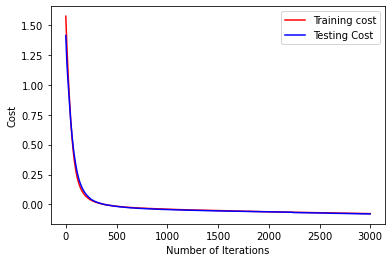

In [25]:
cost_train = np.squeeze(model_train["cost"])
cost_test = np.squeeze(model_test["cost"])

train, = plt.plot(cost_train,label='Training cost', color='red')
test, = plt.plot(cost_test, label="Testing Cost",color='blue')

plt.legend(handles=[train,test])
plt.xlabel("Nú")
plt.ylabel('Cost')
plt.show()